## Vizualization in Julia

- a lot of sense in a fraction of time
- easier comparison

Edward Tufte's book: The Visual Display of Quantative Infromation 1983

-> Quantative: scatterplot, lineplot.. 

-> Qualative: barplot, ... 
             
             -> Ordinal
             
             -> Nominal 

Distrobution Plots: Histogram, KDE, boxplot, violin, ...

## Plots.jl

julia's std lib for drawing plots.

[diffrent backend](https://docs.juliaplots.org/stable/generated/supported/#supported) support: default:GR, PyPlot(matplotlib), PlotlyJS, etc

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

### how to use
    plot( x , y, Attributes:kwargs)
    
 this creats a plot for multiple ys against x, and makes it the CURRENT plot. changes can be made to it. after this with a bang. like specifying attrs.

    plot!(legend=true)
    xlims!( , )
    ylims!( , )
    title!("title")
    xlabel!("x")
    ylabel!("y")
    
we can also set this to a variable to use or modify later, passing it as the first arg

    p = plot(x, y) 

### Let's Create some Data


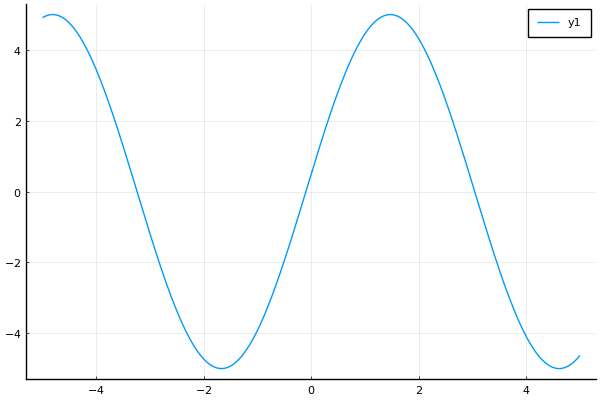

In [2]:
x = -5:0.05:5
y = @. 5*sin(x + 0.1)
plot(x , y)

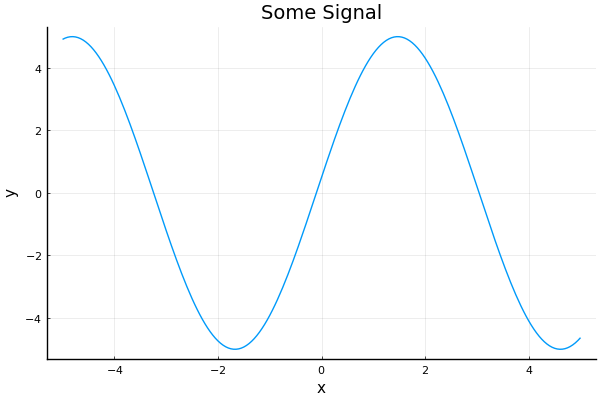

In [3]:
title!("Some Signal")
xlabel!("x")
ylabel!("y")
plot!(legend=false)

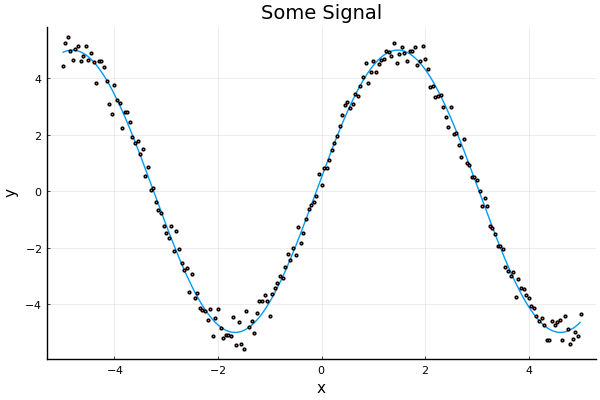

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [4]:
noise = 0.3*randn(length(x))
plot!(x, y+ noise, seriestype=:scatter, ms=2, label="noisy")

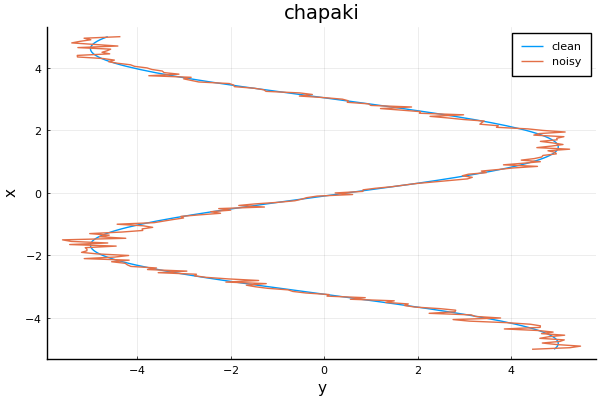

In [12]:
p = plot([y, y+noise], x, labels=["clean" "noisy"])
plot!(p, xlabel = "y")
plot!(p, ylabel = "x")
plot!(p, title="chapaki")

### multiple x and y

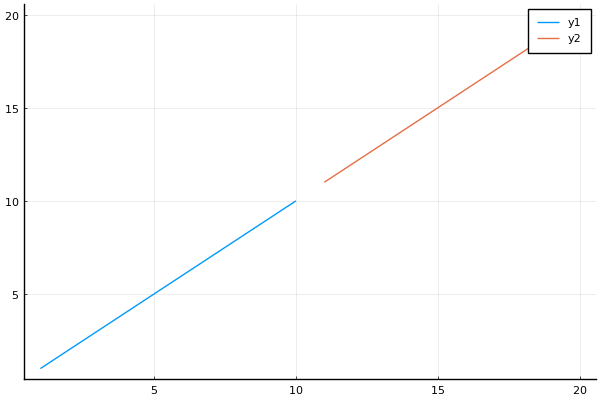

In [6]:
g = plot([1:10 11:20], [1:10 , 11:20])

### LaTeXStrings.jl for scientific writing

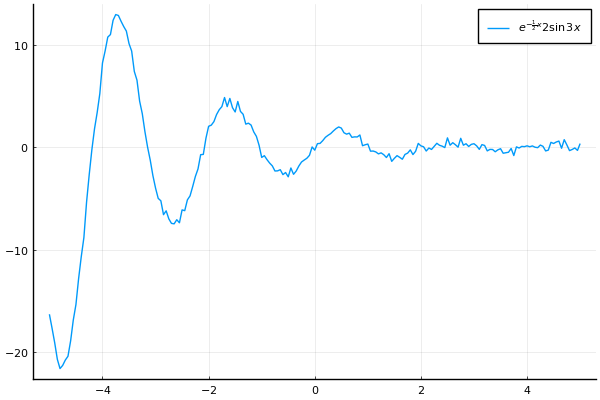

In [7]:
using LaTeXStrings
y2 = @. exp(-0.5*x)*2*sin(3x) + noise
p2 = plot(x, y2, label=L"e^{-\frac{1}{2}x}2\sin3x")

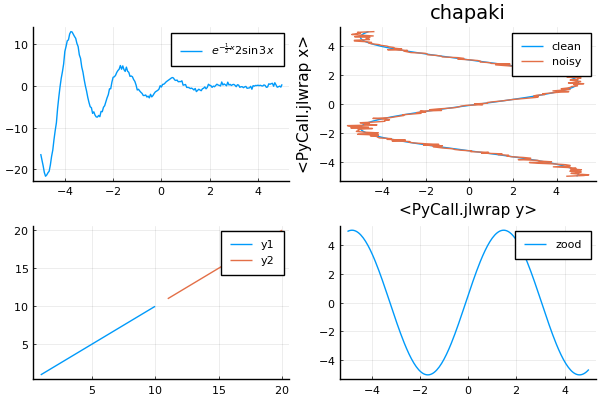

In [8]:
plot(p2, p, g, plot(x,y, label="zood"),  layout=(2,2))

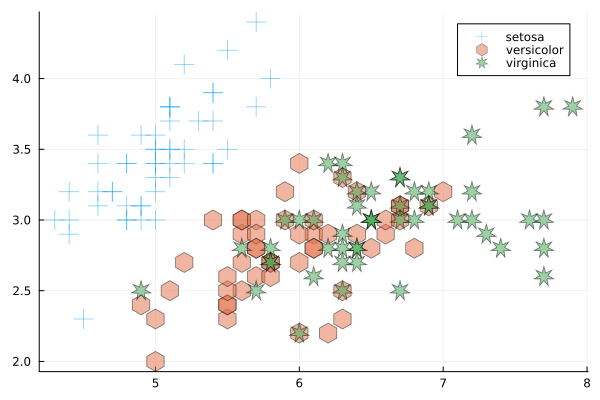

In [28]:
using StatsPlots, RDatasets
gr()
iris = dataset("datasets", "iris")
@df iris scatter(
    :SepalLength,
    :SepalWidth,
    group = :Species,
    m = (0.5, [:+ :h :star7], 10)
)

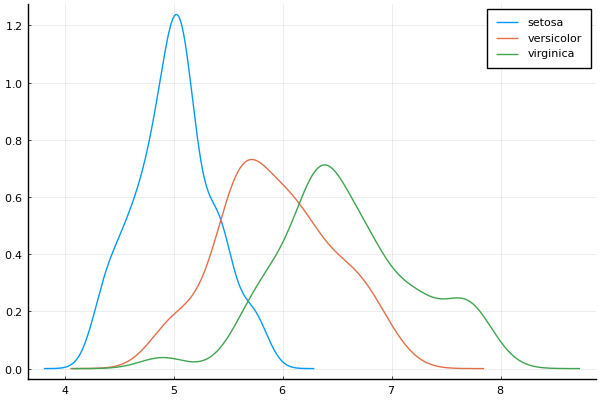

In [24]:
pyplot()
@df iris density(:SepalLength, groups=:Species)

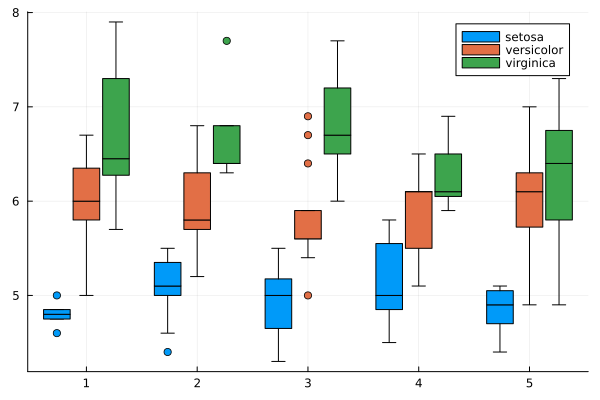

In [44]:
@df iris groupedboxplot(rand(1:5,150), :SepalLength, group=:Species)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
